# Ensemble Learning

This is can be called the *The wisdom of the crowd* imagine if you get thousands of random people and get all their answers. If you look at their aggregated answer it is often better than a single expert answer. 

A group of predictors is called *ensemble* and this technique is called Ensemble Learning and the Ensemble Learning algorithm is called an Ensemble method. 

A example of the Ensemble method is when you get a group of Decision Trees classifiers and train them on a different random subset of the training data. Then each classifer will make a prediction then predict the class that gets the most votes wins.  This is called *Random Forest*. 

## Voting Classifiers

You can have several different classifiers with about 80% accuracy for example:

* Logistic Regression
* SVM classifier
* Random Forest classifier
* KNN classifer

<img src="images/ensemble_learning.png"> </img>

Above we see how each classifer is giving a prediction and we are getting a aggregate of predictions from each classifer than predict the class that gets the most votes. This means if 3 out of 4 classifers vote the instance is class A than class A will be predicted. 

This is a majority vote classifer or *hard voting classifier*. 

<img src="images/ensemble_hard_voting_classifer.png"></img>

You will often see that a voting classifier achieve a higher accuracy than the best classifier. Each classifer is a weak learner or only better than random guessing. The ensemble can still be a strong learner or achieving higher accuracy. This is true if there are sufficient number of weak leaners and are sufficiently diverse. This is because of the law of large numbers. 

Ensemble methods work best when the predicitors are independent from one another as possible. One way to get diverse classifiers is to train them using very different algoithms. This increases the chance that they will make very different types of errors, improving the ensemble's accuracy. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma="scale",random_state=42)

voting_clf = VotingClassifier(
             estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
             voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [5]:
from sklearn.metrics import accuracy_score

In [7]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


What we did was create a ensemble and saw the output for each classifier. The voting classifier did perform the best. 

If all classifiers are able to estimate class probabilities then you can tell SciKit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting*, it is often better than hard voting because you give more weight to highly confident votes. 

You have the predict_prob() to help you determine probability for each classifier. 

In order to apply the different voting you need to pick in the the classifier "hard" or "soft". This is not the case for SVC here you need to set the *probability* param to TRUE. 

## Bagging and Pasting

*Bagging* is when you take the same training algorithm for every predictor and train them on different random subsets of the training set. 

This means every predictor is trained on a different sample of data. Samping performed with replacement is called *bagging* and when smapling is performed without replacement is called *pasting*. 

<img src="images/bagging_pasting.png"/></img>

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(),n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/cisco/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

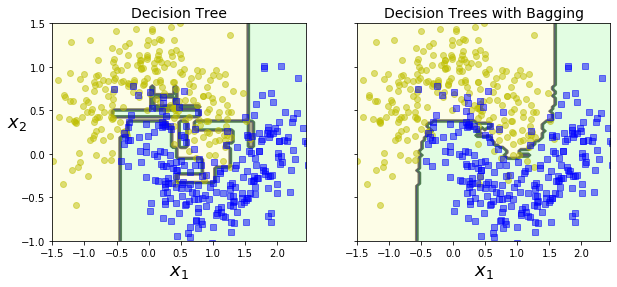

In [22]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

So we see that the Decision Trees are performing better with  Bagging than a single classifier. 